In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the final cleaned file output1.1
df = pd.read_excel('D:/Hackathon_Subject2/DataFiles/output1.3.xlsx')

df.head()

,InvoiceNo,InvoiceDate,CustomerID,Country,Region,StockCode,Description,Quantity,UnitPrice(£),TotalAmount(£)
0,536365,2010-01-12 08:26:00,17850,United Kingdom,Europe,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,536365,2010-01-12 08:26:00,17850,United Kingdom,Europe,71053,WHITE METAL LANTERN,6,3.39,20.34
2,536365,2010-01-12 08:26:00,17850,United Kingdom,Europe,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,536365,2010-01-12 08:26:00,17850,United Kingdom,Europe,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,536365,2010-01-12 08:26:00,17850,United Kingdom,Europe,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


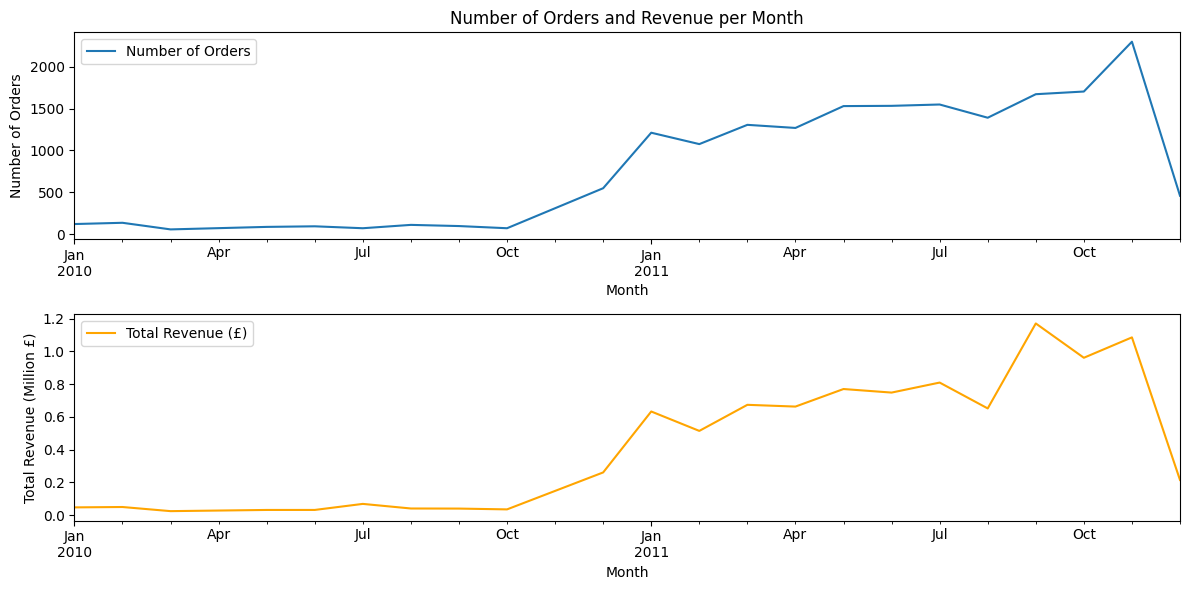

In [2]:
#Graph number of order & revenue over time : status = working 
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and year from 'InvoiceDate'
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Group by month and count the number of orders and total revenue
orders_per_month = df.groupby('Month')['InvoiceNo'].nunique()
revenue_per_month = df.groupby('Month')['TotalAmount(£)'].sum() / 1000000  # Convert to million

# Plotting the trends
plt.figure(figsize=(12, 6))

# Plotting number of orders
plt.subplot(2, 1, 1)
orders_per_month.plot(kind='line', title='Number of Orders and Revenue per Month', label='Number of Orders')
plt.ylabel('Number of Orders')
plt.legend()

# Plotting total revenue in million
plt.subplot(2, 1, 2)
revenue_per_month.plot(kind='line', color='orange', label='Total Revenue (£)')
plt.ylabel('Total Revenue (Million £)')  # Update ylabel to indicate million
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
#include a column seasons
import pandas as pd

# Load the dataset
df = pd.read_excel('D:/Hackathon_Subject2/DataFiles/output1.3.xlsx')

# dictionary mapping region to season
region_season_map = {
    'America': {
        1: 'Winter',
        2: 'Winter',
        3: 'Spring',
        4: 'Spring',
        5: 'Spring',
        6: 'Summer',
        7: 'Summer',
        8: 'Summer',
        9: 'Autumn',
        10: 'Autumn',
        11: 'Autumn',
        12: 'Winter'
    },
    'Oceania': {
        1: 'Summer',
        2: 'Summer',
        3: 'Autumn',
        4: 'Autumn',
        5: 'Autumn',
        6: 'Winter',
        7: 'Winter',
        8: 'Winter',
        9: 'Spring',
        10: 'Spring',
        11: 'Spring',
        12: 'Summer'
    },
    'Africa': {
        1: 'Summer',
        2: 'Summer',
        3: 'Autumn',
        4: 'Autumn',
        5: 'Autumn',
        6: 'Winter',
        7: 'Winter',
        8: 'Winter',
        9: 'Spring',
        10: 'Spring',
        11: 'Spring',
        12: 'Summer'
    },
    'Europe': {
        1: 'Winter',
        2: 'Winter',
        3: 'Spring',
        4: 'Spring',
        5: 'Spring',
        6: 'Summer',
        7: 'Summer',
        8: 'Summer',
        9: 'Autumn',
        10: 'Autumn',
        11: 'Autumn',
        12: 'Winter'
    },
    'Asia': {
        1: 'Winter',
        2: 'Winter',
        3: 'Spring',
        4: 'Spring',
        5: 'Spring',
        6: 'Summer',
        7: 'Summer',
        8: 'Summer',
        9: 'Autumn',
        10: 'Autumn',
        11: 'Autumn',
        12: 'Winter'
    }

}

# Add a 'Seasons' column based on region and month
df['Seasons'] = df.apply(lambda row: region_season_map[row['Region']][row['InvoiceDate'].month], axis=1)

# export output 1.4
df.to_excel('D:/Hackathon_Subject2/DataFiles/output1.4.xlsx', index=False)



In [11]:
import pandas as pd
# Read the final cleaned file output1.4 - contiaing added col seasons
df = pd.read_excel('D:/Hackathon_Subject2/DataFiles/output1.4.xlsx')

df = df[['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Country', 'Region', 'Seasons', 'StockCode', 'Description', 'Quantity', 'UnitPrice(£)', 'TotalAmount(£)']]
df.head()

,InvoiceNo,InvoiceDate,CustomerID,Country,Region,Seasons,StockCode,Description,Quantity,UnitPrice(£),TotalAmount(£)
0,536365,2010-01-12 08:26:00,17850,United Kingdom,Europe,Winter,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,536365,2010-01-12 08:26:00,17850,United Kingdom,Europe,Winter,71053,WHITE METAL LANTERN,6,3.39,20.34
2,536365,2010-01-12 08:26:00,17850,United Kingdom,Europe,Winter,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,536365,2010-01-12 08:26:00,17850,United Kingdom,Europe,Winter,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,536365,2010-01-12 08:26:00,17850,United Kingdom,Europe,Winter,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


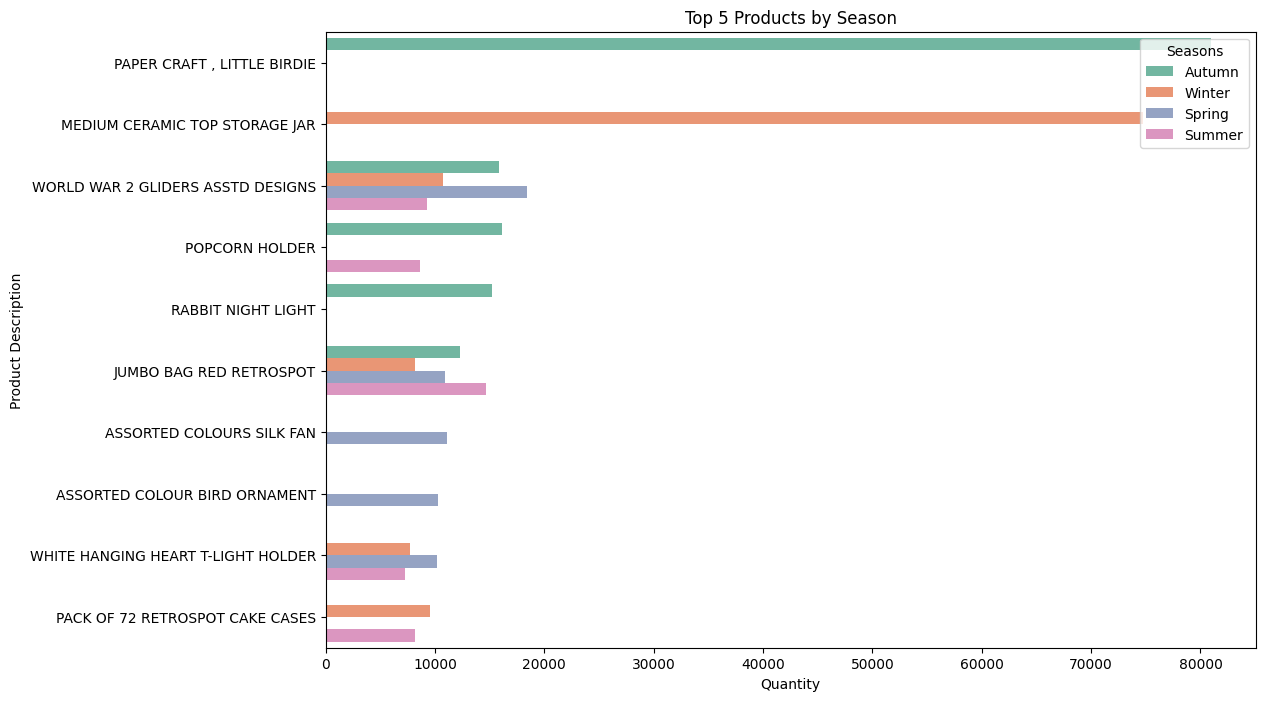

In [14]:
# Get top 5 most purchased products for each season
top_products_by_season = df.groupby(['Seasons', 'Description'])['Quantity'].sum().reset_index()
top_products_by_season = top_products_by_season.sort_values(by='Quantity', ascending=False)
top_products_by_season = top_products_by_season.groupby('Seasons').head(5)

# Plot top products by season
plt.figure(figsize=(12, 8))
sns.barplot(x='Quantity', y='Description', hue='Seasons', data=top_products_by_season, palette='Set2')
plt.xlabel('Quantity')
plt.ylabel('Product Description')
plt.title('Top 5 Products by Season')
plt.legend(title='Seasons', loc='upper right')
plt.show()

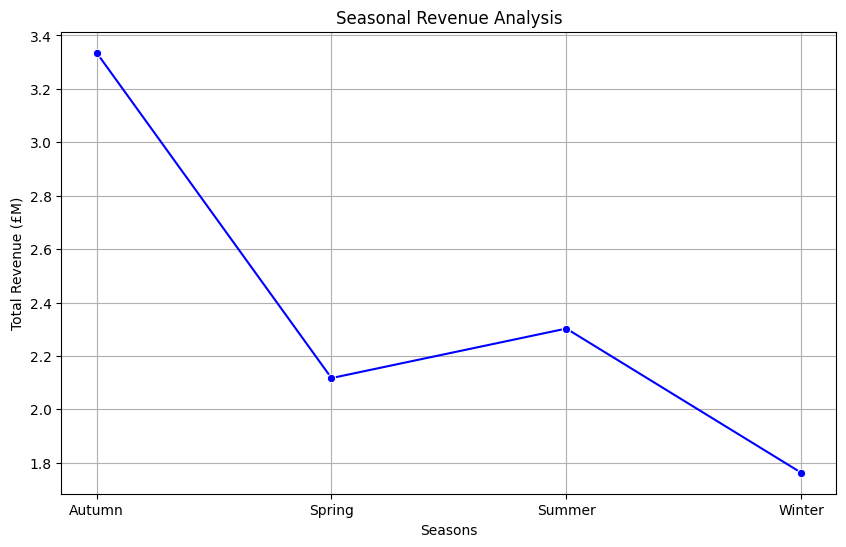

In [20]:
# Aggregate total revenue by season
revenue_by_season = df.groupby('Seasons')['TotalAmount(£)'].sum().reset_index()

# Convert total revenue to millions
revenue_by_season['TotalRevenue(£M)'] = revenue_by_season['TotalAmount(£)'] / 1000000

# Plot seasonal revenue analysis in millions
plt.figure(figsize=(10, 6))
sns.lineplot(x='Seasons', y='TotalRevenue(£M)', data=revenue_by_season, marker='o', color='b')
plt.xlabel('Seasons')
plt.ylabel('Total Revenue (£M)')
plt.title('Seasonal Revenue Analysis')
plt.grid(True)
plt.show()



C:\Users\sivabrian.mooken\AppData\Local\Temp\ipykernel_40024\3538879672.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seasons', y='CustomerID', data=new_customers_by_season, palette='pastel')


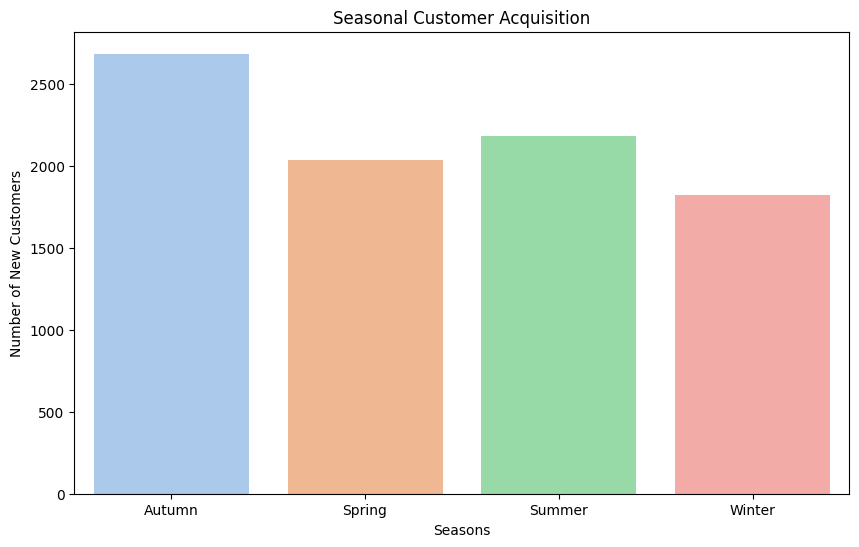

In [16]:
# 'CustomerID' represents a unique customer identifier - use to identify new customers
new_customers_by_season = df.groupby('Seasons')['CustomerID'].nunique().reset_index()

# Plot seasonal customer acquisition
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasons', y='CustomerID', data=new_customers_by_season, palette='pastel')
plt.xlabel('Seasons')
plt.ylabel('Number of New Customers')
plt.title('Seasonal Customer Acquisition')
plt.show()
